In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def p_hat(p, y):
    if y == 1:
        return p
    else:
        return 1-p

In [5]:
def likelihood(ps, ys):
    # ps_arr = []
    # for p, y in zip(ps, ys):
    #     ps_arr.append(p_hat(p, y))

    ps_arr = [p_hat(p, y) for (p, y) in zip(ps, ys)]

    ps_prod = 1
    for p in ps_arr:
        ps_prod *= p
    return ps_prod

In [6]:
test_ps = [0.1, 0.2, 0.3, 0.4]
test_ys = [0, 1, 0, 1]

likelihood(test_ps, test_ys)

0.0504

loglikelihood

In [7]:
def log_p_hat(p, y):
    return np.log(p_hat(p, y))

In [8]:
def loglikelihood(ps, ys):
    # ps - предсказанные вероятности класса 1 моделю для N объектов
    # ys - реальные классы N объектов

    # функция должна использовать log_p_hat и возвращать логарифм правдоподобия
    # (на количество делить не нужно)

    p = np.clip(ps, a_min=1e-6, a_max=1-1e-6)
    log_probs = [log_p_hat(p, y) for (p, y) in zip(ps, ys)]
    loglikelihood_ = 0
    
    for prob in log_probs:
        loglikelihood_+= prob
    
    return -loglikelihood_

In [9]:
loglikelihood(test_ps, test_ys)

2.987764103904814

In [24]:
coins = np.array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

N = 100
p_to_try =  np.linspace(0.1, 1, N)

# < YOUR CODE STARTS HERE >
# Переменная liks должна содержать значения правдоподобия для каждой из 100 вероятностей в p_to_try.
# Переменная logliks должна содержать значения логарифма правдоподобия для каждой из 100 вероятностей в p_to_try.

liks = [likelihood([p]*10, coins) for p in p_to_try]
logliks = [-loglikelihood([p]*10, coins) for p in p_to_try]

# < YOUR CODE ENDS HERE >

C:\Users\3DE9~1\AppData\Local\Temp/ipykernel_1448/294729424.py:2: RuntimeWarning: divide by zero encountered in log
  return np.log(p_hat(p, y))


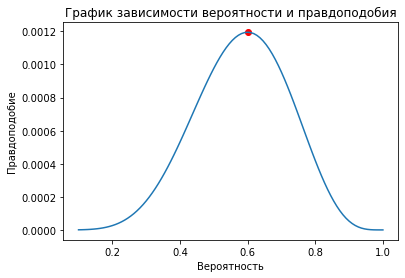

In [17]:
max_lik_idx = np.argmax(liks)

plt.plot(p_to_try, liks)
plt.scatter(p_to_try[max_lik_idx], liks[max_lik_idx] ,c='r')
plt.title('График зависимости вероятности и правдоподобия')
plt.xlabel('Вероятность')
plt.ylabel('Правдоподобие')
plt.show()


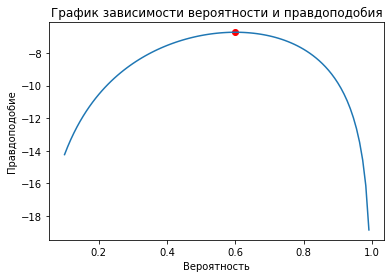

In [22]:
max_lik_idx = np.argmax(logliks)

plt.plot(p_to_try, logliks)
plt.scatter(p_to_try[max_lik_idx], logliks[max_lik_idx] ,c='r')
plt.title('График зависимости вероятности и правдоподобия')
plt.xlabel('Вероятность')
plt.ylabel('Правдоподобие')
plt.show()